# Testing Google Image Scraping

## Setup

In [1]:
!pip install nltk==3.5
!pip install bs4==0.0.1
!pip install spacy==2.3.7
!pip install beautifulsoup4==4.8.2
!pip install selenium
!pip install webdriver_manager
## Setup
# installation for the DataCleaner class
!python -m spacy download en_core_web_md
!python -m nltk.downloader stopwords

  Using cached urllib3-1.26.7-py2.py3-none-any.whl (138 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

requests 2.24.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.7 which is incompatible.


  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

selenium 4.1.0 requires urllib3[secure]~=1.26, but you'll have urllib3 1.25.11 which is incompatible.


[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


C:\Users\nili266\anaconda3\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nili266\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Setup

In [2]:
import bs4 as bs
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from data_cleaning import DataCleaner # from data_cleaning.py
import os
import time

# options for the driver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# service for Chrome and main driver
service = Service("./chrome_driver/windows/chromedriver.exe")
driver = webdriver.Chrome(service=service,options=options)

# DataCleaner to extract important words from a sentence
data_cleaner = DataCleaner()


def get_image_list(query, num_image=10, max_load_time=3):
    if num_image >= 25:
        raise ValueError("""Only get images from the first result page to avoid Google's detection and ban.""")
    start_time = time.time()
    search_terms = data_cleaner.preprocess_split_corpus(query)
    search_link = f"https://www.google.com/search?q={'+'.join(search_terms)}&source=lnms&tbm=isch"
    print("Search link: ", search_link)
    image_list = [] # return list

    # Search in Google Image
    driver.get(search_link)
        
    for i in range(1, num_image + 1):
     
        xPath = """//*[@id="islrg"]/div[1]/div[%s]"""%(i)

        previewImageXPath = """//*[@id="islrg"]/div[1]/div[%s]/a[1]/div[1]/img"""%(i)
        previewImageURL = driver.find_element(By.XPATH, previewImageXPath).get_attribute("src")

        # Click on the preview image
        driver.find_element(By.XPATH, xPath).click()
        
        # full resolution XPATH
        fullResImageXPath = """//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[2]/div[1]/a/img"""

        timeStarted = time.time()
        # wait for the driver to finish loading to get the image
        # Some images have larger size => longer waiting time. if we dont wait, then it will only load the minimal version of the image.
        while True:
            fullResImageURL= driver.find_element(By.XPATH, fullResImageXPath).get_attribute('src')

            # if the full resolution image link is loaded
            if fullResImageURL != previewImageURL:
                break

            else:
                # making a timeout if the full res image can't be loaded
                if time.time() - timeStarted > max_load_time:
                    print("Fail to load image %s under %s seconds. Grabbing thumbnail image."%(i, str(max_load_time)))
                    break
                # pause for 0.3 seconds so that selenium does not constantly ping Google
                time.sleep(0.3)
                
        # insert the link to the list
        image_list.append(fullResImageURL)
    total_time = time.time() - start_time
    print("Total time to run: ", str(round(total_time, 2)), "s")
    return image_list

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nili266\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Test Result

Search link:  https://www.google.com/search?q=first+difference+filter&source=lnms&tbm=isch
Fail to load image 9 under 3 seconds. Grabbing thumbnail image.
Total time to run:  11.97 s


['http://dspfirst.gatech.edu/chapters/05fir/demos/tinvprop/graphics/impResp_1stDiff.png',
 'https://d2vlcm61l7u1fs.cloudfront.net/media%2F95a%2F95aa15be-4ac1-454c-8140-c4d86ca37f2e%2FphpvQmXt4.png',
 'https://www.researchgate.net/profile/Zuzanna-Wosko/publication/292980526/figure/fig3/AS:669547094876179@1536643875663/Gain-functions-of-first-difference-filter-Hodrick-Prescott-H-P-l-14-400.png',
 'http://dspfirst.gatech.edu/chapters/06firfreq/demos/blockd/graphics/w_casc.gif',
 'https://i.stack.imgur.com/c6r9h.jpg',
 'https://media.cheggcdn.com/study/24b/24b569ea-008e-4f33-8eaf-d9d90ea1f42e/image.png',
 'https://noexit.tv/TCDAA/Y2/lp4/S0004E/chapters/05fir/demos/graphics/freq_res.gif',
 'https://media.cheggcdn.com/media/caa/caa91e78-f5c5-44aa-b28a-09e88fd96811/php3bpGVt',
 '',
 'https://www.researchgate.net/profile/Zuzanna-Wosko/publication/292980526/figure/fig3/AS:669547094876179@1536643875663/Gain-functions-of-first-difference-filter-Hodrick-Prescott-H-P-l-14-400_Q640.jpg']
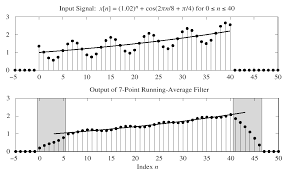

In [3]:
testList = get_image_list("What is the first-difference filter?", num_image=10)
testList